In [1]:
import sympy
from sympy.abc import a

import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

from scipy.optimize import minimize


In [2]:
url='https://www.janestreet.com/puzzles/robot-weightlifting-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\t".join(y[9:33]))))

# Here's the (incorrect) solution I submitted. Didn't take into account seed 1 and seed 2 trying to beat each other 

### June 2021 : Puzzle

Show Solution	The Robot Weightlifting World Championship’s final round is about to
begin!  Three robots, seeded 1, 2, and 3, remain in contention.  They
take turns from the 3rd seed to the 1st seed publicly declaring
exactly how much weight (any nonnegative real number) they will
attempt to lift, and no robot can choose exactly the same amount as a
previous robot.  Once the three weights have been announced, the
robots attempt their lifts, and the robot that successfully lifts the
most weight is the winner.  If all robots fail, they just repeat the
same lift amounts until at least one succeeds.	Assume the following:	1) all the robots have the same probability	p(w)	of successfully
   lifting a given weight	w	;	2)	p(w)	is exactly known by all competitors, continuous, strictly
   decreasing as the	w	increases,	p(0)	= 1, and	p(w)	-> 0 as	w	-> infinity; and	3) all competitors want to maximize their chance of winning the RWWC.	If	w	is the amount of weight the 3rd seed should request, find	p(w)

In [3]:
# Assume the other robots choices are
# 1. go just higher so that p(w') = p(w)
# 2. go lighter so that p(w') = 1
# if b choses lighter will automatically lift if a fails.
# so c must go heavier.

@np.vectorize
def a_wins(a,details = False):
    x = a # b and c pick lighter and will lift so there will be no round 2 (not optimum for c)
    y = a*(1-a) #b choses heavier and c chooses lighter if a & b fail c will win and there will be no round 2
    z = a*(1-a)**2/(1-(1-a)**3) # need a to lift and b and c to fail. 
                                # Iterates so geometric series sum(x^n) = 1/(1-x)
    if details:
        return x,y,z,min(x,y,z)
    else: 
        return -min(x,y,z)


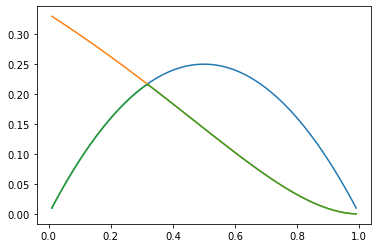

In [4]:
interval = 0.01
a = np.arange(interval,1,interval)

plt.plot(a,a_wins(a,details=True)[1])
plt.plot(a,a_wins(a,details=True)[2])
plt.plot(a,a_wins(a,details=True)[3])
plt.show()

In [5]:
print("Numerical solver {:.6f}".format(minimize(a_wins,0.5).x[0]))


Numerical solver 0.317672


In [6]:
a = sympy.Symbol('a', real=True)

f1 = sympy.Poly(a*(1-a),domain='R')
f2 = sympy.Poly(a*(1-a)**2/(1-(1-a)**3),domain='R')

A=sympy.solve(f1-f2,a)
for sol in A:
    if sol <1:
        print('Solution is {:.6f}'.format(sol))

Solution is 0.317672


In [13]:
url='https://www.janestreet.com/puzzles/robot-weightlifting-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:81]))))

### June 2021 : Solution

To solve this problem, it’s best to work backwards from the decision
of the 1st seed, who selects their attempted weight last.  We will
work with the 1st, 2nd, and 3rd seed’s probability of successfully
lifting their selected weights (we can ignore the actual weight
amounts and just phrase everything in terms of these probabilities).
So the 1st seed knows the probability that the 3rd seed will
successfully lift (call it
x
), and the probability that the 2nd seed
will succeed (
y
).  Given the 1st seed’s lift will only be judged
against the other two lifts, there are three possible strategies to
consider for the 1st seed, any other strategy is dominated by one of
these:
lift an arbitrarily small amount more than the 3rd seed, to have
(
x
-ε) chance of success,
lift an arbitrarily small amount more than the 2nd seed, to have
(
y
-ε) chance of success, or
lift zero weight with success probability 1.
Without loss of generality, we can assume
x
<
y
and compute the curves
that separate the regions where each of these strategies is optimal by
setting their payoffs equal.  The probability of a 1st seed victory of
the respective strategies, as ε -> 0+, are
x
/(1-(1-
x
)
2
(1-
y
))
(1-
x
)
y
/(1-(1-
x
)(1-
y
)
2
)
(1-
x
)(1-
y
)
Setting these pairwise equal divides the space into three regions.  We
can reflect this about the line
x
=
y
and get what the 1st seed will do
in every circumstance (represented by the yellow, blue, and green
regions in the graph).  We then can optimize the 2nd seed’s choice
conditional on the 3rd seed’s selection (represented by the red line
in the graph).
Remarkably, the function for the 2nd seed’s optimal probability of
lifting (
y
), dependent on
x
, is piecewise smooth with
six
different
pieces and
two
jump discontinuities.  Once we have these we can detect
the optimal choice for the 3rd seed (the circled point on the graph).
This ends up being
0.286833…
which is one of the points of triple
intersection of the three strategies listed above.  That is, it turns
out to be in the best interest of the 3rd seed to “collaborate” with
the 2nd seed to make the 1st seed indifferent between the three
strategies listed
1
.  Unfortunately for the 3rd seed, the
only way to get the 2nd seed to cooperate with this plan is to accept
the worse of the two positions in this triple-intersection point.  So
the selections will be:
x
= 0.286833…
y
= 0.436041…
z
= 1
Which leads to the following probabilities of winning:
3rd seed: 0.286833…
2nd seed: 0.310970…
1st seed: 0.402197…
[1] While the 1st seed is indifferent between the three idealized
strategies, only one of them is achievable because the other two
strategies are limiting as ε -> 0.  So we can assume that if the
3rd seed and 2nd seed exactly measured their weights to perfect
precision, the 1st seed would choose the zero weight lift.

<img src='https://www.janestreet.com/puzzles/2021-06-01-robot-weightlifting-solution.jpg'>